In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import warnings;
warnings.filterwarnings("ignore")

In [304]:
df1=pd.read_excel('vel_2017.xlsx')

In [305]:
df1.head()

,From Date,To Date,CO,Ozone,NO2,NO,NOx,SO2,RH,VWS,...,WD,BP,PM2.5,Temp,SR,Benzene,MP-Xylene,Toluene,O,Eth-Benzene
0,01-01-2017 00:00,01-01-2017 01:00,165.03,2.84,24.15,7.71,None,2.48,86.34,0.06,...,186.03,1015.27,26.97,None,0.66,2.22,4.93,9.97,2.21,NaN
1,01-01-2017 01:00,01-01-2017 02:00,171.83,4.88,20.28,4.36,None,2.93,86.78,0.08,...,261.78,1014.55,34.88,None,0.68,2.1,3.87,7.93,1.83,NaN
2,01-01-2017 02:00,01-01-2017 03:00,169.17,4.57,18.6,3.78,None,2.72,89.43,0.07,...,180.56,1013.88,57.49,None,0.27,1.69,1.71,2.97,3.36,NaN
3,01-01-2017 03:00,01-01-2017 04:00,170.48,6.1,16.03,3.16,None,3.03,90.15,0.08,...,353.43,1013.48,62.75,None,2.33,1.69,2.88,5.47,2.2,NaN
4,01-01-2017 04:00,01-01-2017 05:00,171.73,10.07,10.18,2.05,None,2.74,93.62,0.08,...,11.94,1013.73,67.49,None,0.2,0.07,1.61,3.61,0.08,NaN


In [306]:
df=df1[['From Date','BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']]

In [307]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2017 00:00,1015.27,165.03,0.06,186.03,0.17,7.71,24.15,26.97,86.34,2.48,0.66
1,01-01-2017 01:00,1014.55,171.83,0.08,261.78,0.35,4.36,20.28,34.88,86.78,2.93,0.68
2,01-01-2017 02:00,1013.88,169.17,0.07,180.56,0.26,3.78,18.6,57.49,89.43,2.72,0.27
3,01-01-2017 03:00,1013.48,170.48,0.08,353.43,0.28,3.16,16.03,62.75,90.15,3.03,2.33
4,01-01-2017 04:00,1013.73,171.73,0.08,11.94,0.27,2.05,10.18,67.49,93.62,2.74,0.2


In [308]:
df.shape

(8760, 12)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
From Date    8760 non-null object
BP           8760 non-null object
CO           8760 non-null object
VWS          8760 non-null object
WD           8760 non-null object
WS           8760 non-null object
NO           8760 non-null object
NO2          8760 non-null object
PM2.5        8760 non-null object
RH           8760 non-null object
SO2          8760 non-null object
SR           8760 non-null object
dtypes: object(12)
memory usage: 821.4+ KB


In [310]:
for i in df.columns:
    for j in df[i]:
        if(j=='None'):
            df[i]=df[i].replace(j,np.nan)

In [311]:
print("Percentage of Null values in Velachery 2017: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Velachery 2017:  5.878995433789954


In [312]:
df.isna().sum()

From Date      0
BP           547
CO           548
VWS          564
WD           602
WS           592
NO           555
NO2          553
PM2.5        548
RH           575
SO2          550
SR           546
dtype: int64

In [313]:
list1=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
count=0
for i in list1:
    for j in df[i]:
        if(j<0):
            count=count+1

In [314]:
count

94

In [315]:
count/(len(df)*12)

0.0008942161339421614

In [316]:
"""for col in list1:
    if (df[col]<0).sum() >1 and col != 'VWS':
        df[col][(df[col]<0)] = np.NaN"""

"for col in list1:\n    if (df[col]<0).sum() >1 and col != 'VWS':\n        df[col][(df[col]<0)] = np.NaN"

In [317]:
df['CO'][(df['CO']>0) & (df['CO']<80)]

2773    42.35
6375     1.44
6607    70.65
6614    15.10
6991     1.32
        ...  
8362     0.44
8380     0.40
8381     0.24
8635     0.83
8636     0.51
Name: CO, Length: 808, dtype: float64

In [318]:
for col in list1:
    if(col!='VWS'):
        for j in df[col]:
            if(j<0):
                df[col]=df[col].replace(j,np.nan)

In [319]:
df.isna().sum()

From Date      0
BP           547
CO           549
VWS          564
WD           602
WS           592
NO           563
NO2          553
PM2.5        548
RH           600
SO2          550
SR           578
dtype: int64

In [320]:
print("Percentage of Null values in Velachery 2017: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Velachery 2017:  5.941780821917809


In [321]:
list1=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
count=0
for i in list1:
    for j in df[i]:
        if(j<0):
            count=count+1

In [322]:
count

28

In [323]:
df.isna().sum()

From Date      0
BP           547
CO           549
VWS          564
WD           602
WS           592
NO           563
NO2          553
PM2.5        548
RH           600
SO2          550
SR           578
dtype: int64

In [324]:
df=df.dropna(axis=0,subset=['PM2.5'])

In [325]:
m=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
for col in m:
    df[col] = df[col].interpolate(method='nearest',limit_direction = 'both')

In [326]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

In [327]:
df['BP']=df['BP'].astype(float)
df['CO']=df['CO'].astype(float)
df['VWS']=df['VWS'].astype(float)
df['WD']=df['WD'].astype(float)
df['WS']=df['WS'].astype(float)
df['NO']=df['NO'].astype(float)
df['NO2']=df['NO2'].astype(float)
df['PM2.5']=df['PM2.5'].astype(float)
df['RH']=df['RH'].astype(float)
df['SO2']=df['SO2'].astype(float)
df['SR']=df['SR'].astype(float)

In [328]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2017 00:00,1015.27,165.03,0.06,186.03,0.17,7.71,24.15,26.97,86.34,2.48,0.66
1,01-01-2017 01:00,1014.55,171.83,0.08,261.78,0.35,4.36,20.28,34.88,86.78,2.93,0.68
2,01-01-2017 02:00,1013.88,169.17,0.07,180.56,0.26,3.78,18.60,57.49,89.43,2.72,0.27
3,01-01-2017 03:00,1013.48,170.48,0.08,353.43,0.28,3.16,16.03,62.75,90.15,3.03,2.33
4,01-01-2017 04:00,1013.73,171.73,0.08,11.94,0.27,2.05,10.18,67.49,93.62,2.74,0.20


In [329]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000
mean,903.166778,652.588354,0.123401,147.012544,1.161465,5.248422,15.074605,30.809720,64.575972,4.081673,148.138928
std,307.889080,654.789809,0.105510,98.996017,0.883127,11.929179,16.396508,25.126528,26.868534,6.798189,236.630065
min,0.000000,0.000000,-2.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1005.570000,0.950000,0.070000,42.875000,0.520000,2.450000,7.720000,15.897500,52.250000,2.320000,0.000000
50%,1008.550000,527.400000,0.120000,157.965000,1.030000,3.470000,12.270000,27.515000,68.930000,3.265000,1.820000
75%,1011.680000,986.605000,0.180000,207.460000,1.700000,5.320000,18.942500,41.612500,84.092500,4.680000,222.312500
max,1020.350000,9999.900000,0.680000,358.710000,7.620000,501.310000,505.570000,584.230000,418.960000,500.400000,999.990000


In [330]:
df['CO'] = np.where((df.CO >100),df['CO']/1000,df.CO)


In [331]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000
mean,903.166778,0.795252,0.123401,147.012544,1.161465,5.248422,15.074605,30.809720,64.575972,4.081673,148.138928
std,307.889080,2.293146,0.105510,98.996017,0.883127,11.929179,16.396508,25.126528,26.868534,6.798189,236.630065
min,0.000000,0.000000,-2.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1005.570000,0.334040,0.070000,42.875000,0.520000,2.450000,7.720000,15.897500,52.250000,2.320000,0.000000
50%,1008.550000,0.614775,0.120000,157.965000,1.030000,3.470000,12.270000,27.515000,68.930000,3.265000,1.820000
75%,1011.680000,1.040625,0.180000,207.460000,1.700000,5.320000,18.942500,41.612500,84.092500,4.680000,222.312500
max,1020.350000,99.550000,0.680000,358.710000,7.620000,501.310000,505.570000,584.230000,418.960000,500.400000,999.990000


In [332]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

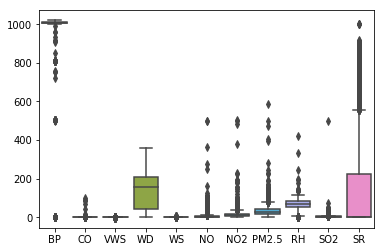

In [333]:
sns.boxplot(data=df)

In [334]:
df.shape

(8212, 12)

In [335]:
df['location']=1
df['location']=df['location'].astype('category')

In [336]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR,location
0,01-01-2017 00:00,1015.27,0.16503,0.06,186.03,0.17,7.71,24.15,26.97,86.34,2.48,0.66,1
1,01-01-2017 01:00,1014.55,0.17183,0.08,261.78,0.35,4.36,20.28,34.88,86.78,2.93,0.68,1
2,01-01-2017 02:00,1013.88,0.16917,0.07,180.56,0.26,3.78,18.60,57.49,89.43,2.72,0.27,1
3,01-01-2017 03:00,1013.48,0.17048,0.08,353.43,0.28,3.16,16.03,62.75,90.15,3.03,2.33,1
4,01-01-2017 04:00,1013.73,0.17173,0.08,11.94,0.27,2.05,10.18,67.49,93.62,2.74,0.20,1


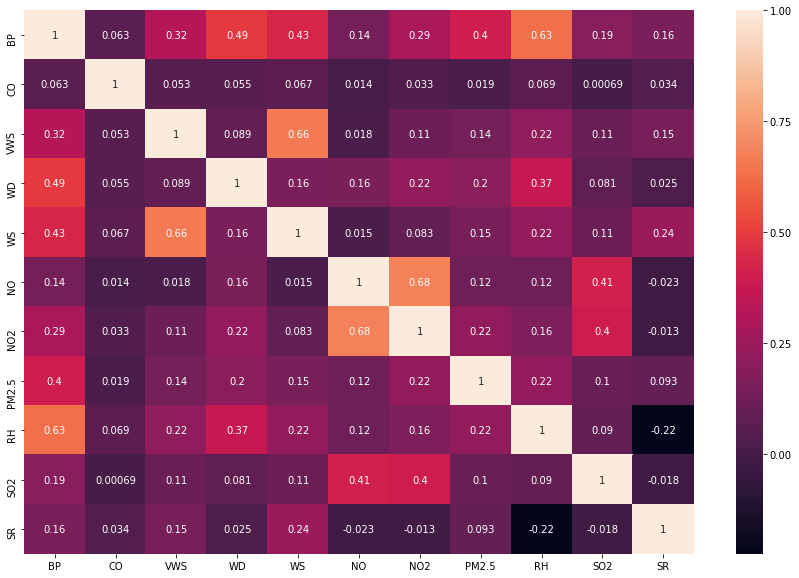

In [337]:
m=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(m,annot=True)

In [338]:
df.columns

Index(['From Date', 'BP', 'CO', 'VWS', 'WD', 'WS', 'NO', 'NO2', 'PM2.5', 'RH',
       'SO2', 'SR', 'location'],
      dtype='object')

In [339]:
"""iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)
up_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)
low_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)

iqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)
up_co=df['CO'].quantile(.75)+(1.5*iqr_co)
low_co=df['CO'].quantile(.25)-(1.5*iqr_co)

iqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)
up_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)
low_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)


iqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)
up_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)
low_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)


iqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)
up_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)
low_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)

iqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)
up_no=df['NO'].quantile(.75)+(1.5*iqr_no)
low_no=df['NO'].quantile(.25)-(1.5*iqr_no)

iqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)
up_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)
low_no2=df['NO2'].quantile(.25)-(1.5*iqr_no2)


iqr_pm=df['PM2.5'].quantile(.75)-df['PM2.5'].quantile(.25)
up_pm=df['PM2.5'].quantile(.75)+(1.5*iqr_pm)
low_pm=df['PM2.5'].quantile(.25)-(1.5*iqr_pm)

iqr_rh=df['RH'].quantile(.75)-df['RH'].quantile(.25)
up_rh=df['RH'].quantile(.75)+(1.5*iqr_rh)
low_rh=df['RH'].quantile(.25)-(1.5*iqr_rh)

iqr_so2=df['SO2'].quantile(.75)-df['SO2'].quantile(.25)
up_so2=df['SO2'].quantile(.75)+(1.5*iqr_so2)
low_so2=df['SO2'].quantile(.25)-(1.5*iqr_so2)

iqr_sr=df['SR'].quantile(.75)-df['SR'].quantile(.25)
up_sr=df['SR'].quantile(.75)+(1.5*iqr_sr)
low_sr=df['SR'].quantile(.25)-(1.5*iqr_sr)
"""

"iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)\nup_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)\nlow_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)\n\niqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)\nup_co=df['CO'].quantile(.75)+(1.5*iqr_co)\nlow_co=df['CO'].quantile(.25)-(1.5*iqr_co)\n\niqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)\nup_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)\nlow_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)\n\n\niqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)\nup_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)\nlow_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)\n\n\niqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)\nup_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)\nlow_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)\n\niqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)\nup_no=df['NO'].quantile(.75)+(1.5*iqr_no)\nlow_no=df['NO'].quantile(.25)-(1.5*iqr_no)\n\niqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)\nup_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)\nlow_no2=df['NO2'].quantil

In [340]:
"""for i in df['CO']:
    if(i>up_co):
        df['CO']=df['CO'].replace(i,up_co)

for i in df['NO2']:
    if(i>up_no2):
        df['NO2']=df['NO2'].replace(i,up_no2)
for i in df['NO']:
    if(i>up_no):
        df['NO']=df['NO'].replace(i,up_no)

for i in df['SO2']:
    if(i>up_so2):
        df['SO2']=df['SO2'].replace(i,up_so2)
        
for i in df['RH']:
    if(i>up_rh):
        df['RH']=df['RH'].replace(i,up_rh)
        
for i in df['VWS']:
    if(i>up_vws):
        df['VWS']=df['VWS'].replace(i,up_vws)
        
for i in df['WS']:
    if(i>up_ws):
        df['WS']=df['WS'].replace(i,up_ws)
        
for i in df['WD']:
    if(i>up_wd):
        df['WD']=df['WD'].replace(i,up_wd)
        
for i in df['PM2.5']:
    if(i>up_pm):
        df['PM2.5']=df['PM2.5'].replace(i,up_pm)
        
for i in df['SR']:
    if(i>up_sr):
        df['SR']=df['SR'].replace(i,up_sr)

for i in df['BP']:
    if(i<low_bp):
        df['BP']=df['BP'].replace(i,low_bp)
    elif(i>up_bp):
        df['BP']=df['BP'].replace(i,up_bp)"""

"for i in df['CO']:\n    if(i>up_co):\n        df['CO']=df['CO'].replace(i,up_co)\n\nfor i in df['NO2']:\n    if(i>up_no2):\n        df['NO2']=df['NO2'].replace(i,up_no2)\nfor i in df['NO']:\n    if(i>up_no):\n        df['NO']=df['NO'].replace(i,up_no)\n\nfor i in df['SO2']:\n    if(i>up_so2):\n        df['SO2']=df['SO2'].replace(i,up_so2)\n        \nfor i in df['RH']:\n    if(i>up_rh):\n        df['RH']=df['RH'].replace(i,up_rh)\n        \nfor i in df['VWS']:\n    if(i>up_vws):\n        df['VWS']=df['VWS'].replace(i,up_vws)\n        \nfor i in df['WS']:\n    if(i>up_ws):\n        df['WS']=df['WS'].replace(i,up_ws)\n        \nfor i in df['WD']:\n    if(i>up_wd):\n        df['WD']=df['WD'].replace(i,up_wd)\n        \nfor i in df['PM2.5']:\n    if(i>up_pm):\n        df['PM2.5']=df['PM2.5'].replace(i,up_pm)\n        \nfor i in df['SR']:\n    if(i>up_sr):\n        df['SR']=df['SR'].replace(i,up_sr)\n\nfor i in df['BP']:\n    if(i<low_bp):\n        df['BP']=df['BP'].replace(i,low_bp)\n    e

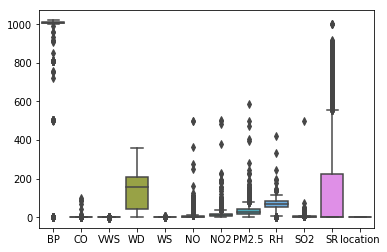

In [341]:
sns.boxplot(data=df)

In [342]:
result_csv1 = df.to_csv (r'C:\dse_new\eda_vel_17.csv', index = None, header=True)

# Upto this basic EDA is done

# ---------------------------------------------------------------------------------------------------------------

In [343]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000
mean,903.166778,0.795252,0.123401,147.012544,1.161465,5.248422,15.074605,30.809720,64.575972,4.081673,148.138928
std,307.889080,2.293146,0.105510,98.996017,0.883127,11.929179,16.396508,25.126528,26.868534,6.798189,236.630065
min,0.000000,0.000000,-2.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1005.570000,0.334040,0.070000,42.875000,0.520000,2.450000,7.720000,15.897500,52.250000,2.320000,0.000000
50%,1008.550000,0.614775,0.120000,157.965000,1.030000,3.470000,12.270000,27.515000,68.930000,3.265000,1.820000
75%,1011.680000,1.040625,0.180000,207.460000,1.700000,5.320000,18.942500,41.612500,84.092500,4.680000,222.312500
max,1020.350000,99.550000,0.680000,358.710000,7.620000,501.310000,505.570000,584.230000,418.960000,500.400000,999.990000
